# Projet IA.
## Livrable code


|Auteur|Modification|
|---|---|
|Majorel Pierre|2023/03/13|
|Alami Ouali Othmane|2023/03/13|
|Lopez Daniel|2023/03/13|

### Préparation de l'environnement

Ci-dessous quelques imports et précautions préalables à notre travail.

In [1]:
!pip install numpy
!pip install pandas
!pip install sklearn

In [25]:
# import
import numpy as np
import os

from numpy.random import default_rng
# stabilité du notebook d'une exécution à l'autre
random=default_rng(42) 

# jolies figures directement dans le notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# où sauver les figures
PROJECT_ROOT_DIR = r"." #changez ce chemin en fonction de votre dossier
CHAPTER_ID = "Images_Projet"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID) # le dossier doit exister

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Import des données

Il convient d'automatiser l'import des données. On va implémenter une fonction qui se charge de :
* télécharger l'archive
* extraire les fichiers

On peut maintenant importer les données :

### Chargement des données en mémoire

In [26]:
###########TOUT A MODIFIER###########
import pandas as pd

def load_donnees_data():
    csv_path = "Donnees_triees.csv"
    return pd.read_csv(csv_path, encoding = "ISO-8859-1")

donnees = load_donnees_data()
###########TOUT A MODIFIER###########

In [27]:
donnees.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,Gender,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,WorkLifeBalance,JobInvolvement,Heure moyenne par jour sur l'annï¿½e,Nombre de jour travaillï¿½s
0,1,51,No,Travel_Rarely,Sales,6,2,Female,1,Healthcare Representative,...,1.0,6,1,0,0,3.0,2.0,3,06:33:16,232
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Female,1,Research Scientist,...,6.0,3,5,1,4,3.0,4.0,2,06:58:47,236
2,3,32,No,Travel_Frequently,Research & Development,17,4,Male,4,Sales Executive,...,5.0,2,5,0,3,2.0,1.0,3,06:30:10,242
3,4,38,No,Non-Travel,Research & Development,2,5,Male,3,Human Resources,...,13.0,5,8,7,5,4.0,3.0,2,06:28:37,235
4,5,32,No,Travel_Rarely,Research & Development,10,1,Male,1,Sales Executive,...,9.0,2,6,0,4,4.0,3.0,3,07:30:55,245


In [34]:
donnees.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3528 entries, 1514 to 209
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   EmployeeID                            3528 non-null   int64  
 1   Age                                   3528 non-null   int64  
 2   BusinessTravel                        3528 non-null   object 
 3   Department                            3528 non-null   object 
 4   DistanceFromHome                      3528 non-null   int64  
 5   Education                             3528 non-null   int64  
 6   Gender                                3528 non-null   object 
 7   JobLevel                              3528 non-null   int64  
 8   JobRole                               3528 non-null   object 
 9   MonthlyIncome                         3528 non-null   int64  
 10  NumCompaniesWorked                    3511 non-null   float64
 11  PercentSalaryHi

### Visualization des données

Nous affichons un histogramme par attribut numérique

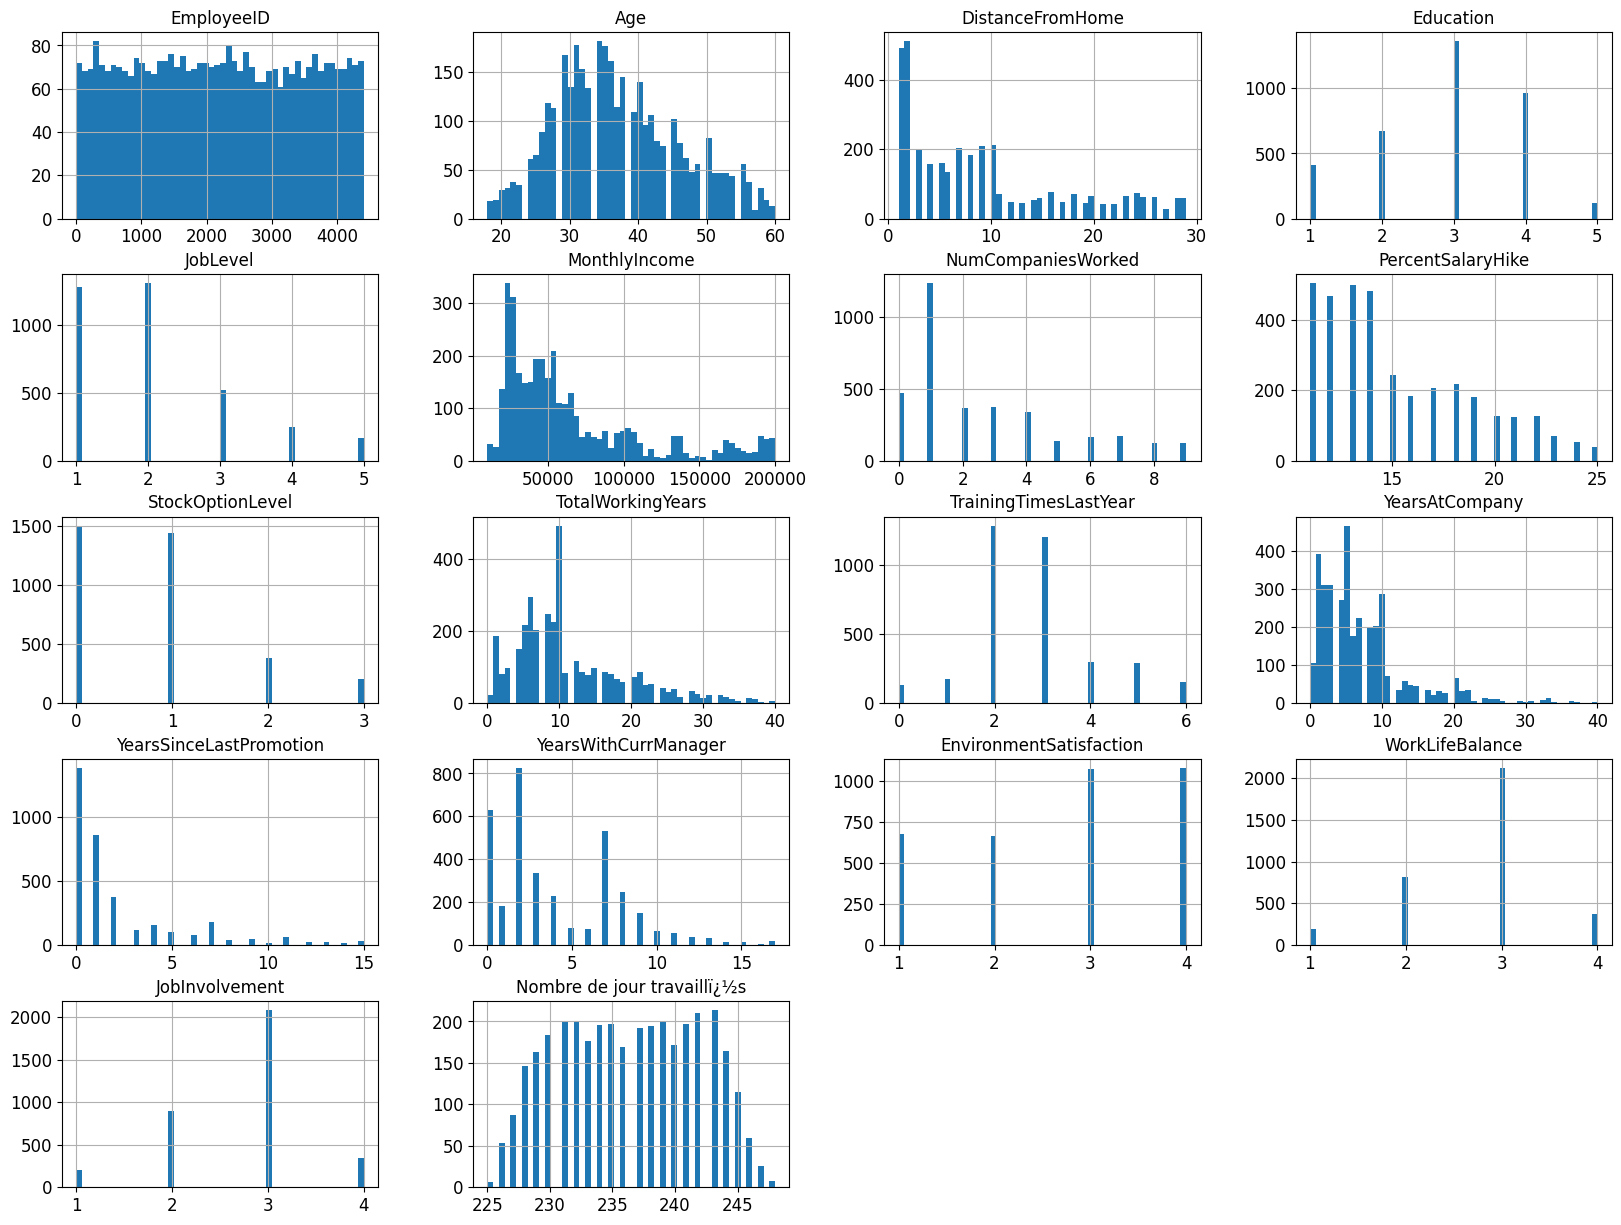

In [32]:
donnees.hist(bins=50, figsize=(20,15))
plt.show()

### Séparation du jeu de donnée

Ici nous allons couper notre jeu de données en deux 
* 1) Le train set
* 2) Le test set

In [31]:
###########TOUT A MODIFIER###########
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

donnees["Attrition"] = np.ceil(donnees["MonthlyIncome"]/1.5)
donnees["Attrition"].where(donnees["Attrition"] < 5, 5.0, inplace=True) # replace where false

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(donnees, donnees["Attrition"]):
    strat_train_set = donnees.loc[train_index]
    strat_test_set = donnees.loc[test_index]

for set_ in (strat_train_set, strat_test_set):
    set_.drop("Attrition", axis=1, inplace=True)

donnees = strat_train_set.copy()
###########TOUT A MODIFIER###########

### Création de la pipeline

In [ ]:
###########TOUT A MODIFIER###########
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num = housing.select_dtypes(include=[np.number]) 
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
###########TOUT A MODIFIER###########

### Utilisation du modèle X

### Indice de qualité du modèle X

#### Précision et recall

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores) # A changer

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): # A changer
    plt.plot(thresholds, precisions[:-1], "b-", label="Precision", linewidth=2) # A changer
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2) # A changer
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds) # A changer
plt.xlim([-700000, 700000])
save_fig("precision_recall_vs_threshold_plot")
plt.show()

def plot_precision_vs_recall(precisions, recalls): # A changer
    plt.plot(recalls, precisions, "k-", linewidth=2) # A changer
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls) # A changer
save_fig("precision_vs_recall_plot")
plt.show()

#### Courbe ROC

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores) # A changer

def plot_roc_curve(fpr, tpr, label=None): # A changer
    plt.plot(fpr, tpr, linewidth=2, label=label) # A changer
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr) # A changer
save_fig("roc_curve_plot")
plt.show()

### Cross validation pour tester le modèle X

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, # A changer
                         scoring="neg_mean_squared_error", cv=10) # A changer
tree_rmse_scores = np.sqrt(-scores) # A changer

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

### Utilisation du modèle Y

### Indice de qualité du modèle Y

#### Précision et recall

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores) # A changer

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): # A changer
    plt.plot(thresholds, precisions[:-1], "b-", label="Precision", linewidth=2) # A changer
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2) # A changer
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds) # A changer
plt.xlim([-700000, 700000])
save_fig("precision_recall_vs_threshold_plot")
plt.show()

def plot_precision_vs_recall(precisions, recalls): # A changer
    plt.plot(recalls, precisions, "k-", linewidth=2) # A changer
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls) # A changer
save_fig("precision_vs_recall_plot")
plt.show()

#### Courbe ROC

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores) # A changer

def plot_roc_curve(fpr, tpr, label=None): # A changer
    plt.plot(fpr, tpr, linewidth=2, label=label) # A changer
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr) # A changer
save_fig("roc_curve_plot")
plt.show()

### Cross validation pour tester le modèle Y

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, # A changer
                         scoring="neg_mean_squared_error", cv=10) # A changer
tree_rmse_scores = np.sqrt(-scores) # A changer

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

### Utilisation du modèle N

### Indice de qualité du modèle N

#### Précision et recall

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores) # A changer

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): # A changer
    plt.plot(thresholds, precisions[:-1], "b-", label="Precision", linewidth=2) # A changer
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2) # A changer
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds) # A changer
plt.xlim([-700000, 700000])
save_fig("precision_recall_vs_threshold_plot")
plt.show()

def plot_precision_vs_recall(precisions, recalls): # A changer
    plt.plot(recalls, precisions, "k-", linewidth=2) # A changer
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls) # A changer
save_fig("precision_vs_recall_plot")
plt.show()

#### Courbe ROC

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores) # A changer

def plot_roc_curve(fpr, tpr, label=None): # A changer
    plt.plot(fpr, tpr, linewidth=2, label=label) # A changer
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr) # A changer
save_fig("roc_curve_plot")
plt.show()

### Cross validation pour tester le modèle N

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, # A changer
                         scoring="neg_mean_squared_error", cv=10) # A changer
tree_rmse_scores = np.sqrt(-scores) # A changer

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

### Séléction du meilleur modèle

#### Courbe ROC de comparaison

Afin de choisir un modèle, nous allons utiliser les différentes courbes ROC réalisées précédement et les comparer.
Le modèle ayant la meilleure courbe sera celui que nous séléctionnerons pour la suite du projet.

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD") #A modifier
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest") #A modifier
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

### Entrainement sur le test set

In [ ]:
###########TOUT A MODIFIER###########
final_model = random_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
###########TOUT A MODIFIER###########

### Utilistation du modèle pour les prédictions

In [ ]:
###########TOUT A MODIFIER###########
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_rmse = mean_squared_error(y_test, final_predictions, squared = False)
final_rmse
###########TOUT A MODIFIER###########

#### Conclusion